In [1]:
#Open Google Drive Access

from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os
import zipfile

local_zip = '/content/gdrive/MyDrive/Data Capstone/data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
import random
import shutil
from shutil import copyfile

try:
    jenis_tumbuhan = ['daun-jarak/', 'daun-pegagan/', 'daun-sirih/', 'kumis-kucing/', 'lidah-buaya/']

    for name in jenis_tumbuhan:
      os.makedirs('/tmp/data/training/' + name)
      os.makedirs('/tmp/data/testing/' + name)

except OSError:
    pass

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    image_list = []
    for image in os.listdir(SOURCE):
        if os.path.getsize(SOURCE + image)>0:
            image_list.append(image)
        else:
            print(image + 'have zero length, so discard.')
    
    rndm_image_list = random.sample(image_list, len(image_list))
    train_rndm_image_list = rndm_image_list[:int(len(image_list)*SPLIT_SIZE)]
    test_rndm_image_list = rndm_image_list[int(len(image_list)*SPLIT_SIZE):]
    
    print(len(test_rndm_image_list))
    for image in train_rndm_image_list:
        shutil.copyfile(SOURCE + image, TRAINING + image)
        
    for image in test_rndm_image_list:
        shutil.copyfile(SOURCE + image, TESTING + image)

source_dir = []
train_dir = []
test_dir = []
jenis_tumbuhan = ['daun-jarak/', 'daun-pegagan/', 'daun-sirih/', 'kumis-kucing/', 'lidah-buaya/']

for name in jenis_tumbuhan:
  source_dir.append('/tmp/data/' + name)
  train_dir.append('/tmp/data/training/' + name)
  test_dir.append('/tmp/data/testing/' + name)

split_size = .9
i = 0

for i in range(len(source_dir)):
  split_data(source_dir[i], train_dir[i], test_dir[i], split_size)

91
110
102
104
95


In [ ]:
daunjarak_dir = train_dir[0]
daunpegagan_dir = train_dir[1]
daunsirih_dir = train_dir[2]
kumiskucing_dir = train_dir[3]
lidahbuaya_dir = train_dir[4]

print('Total training daun jarak images:', len(os.listdir(daunjarak_dir)))
print('Total training kumis kucing images:', len(os.listdir(daunpegagan_dir)))
print('Total training lidah buaya images:', len(os.listdir(daunsirih_dir)))
print('Total training daun pegagan images:', len(os.listdir(kumiskucing_dir)))
print('Total training dauh sirih images:', len(os.listdir(lidahbuaya_dir)))


daunjarak_files = os.listdir(daunjarak_dir)
# print(daunjarak_files[:10])

daunpegagan_files = os.listdir(daunpegagan_dir)
# print(kumiskucing_files[:10])

daunsirih_files = os.listdir(daunsirih_dir)
# print(lidahbuaya_files[:10])

kumiskucing_files = os.listdir(kumiskucing_dir)
# print(daunpegagan_files[:10])

lidahbuaya_files = os.listdir(lidahbuaya_dir)
# print(daunsirih_files[:10])

Total training daun jarak images: 816
Total training kumis kucing images: 989
Total training lidah buaya images: 918
Total training daun pegagan images: 929
Total training dauh sirih images: 849


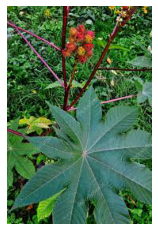

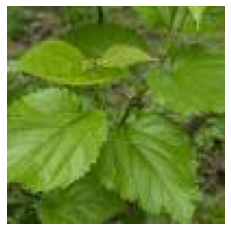

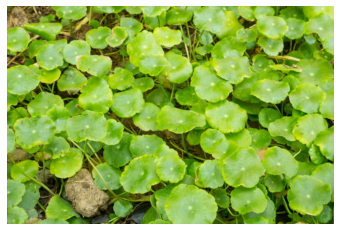

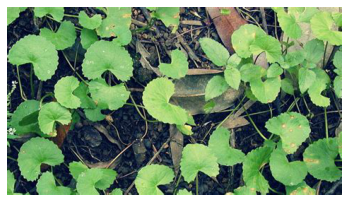

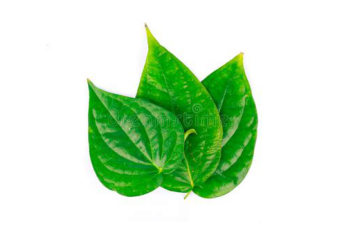

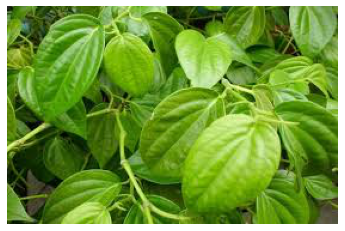

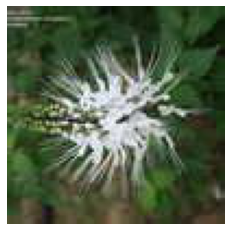

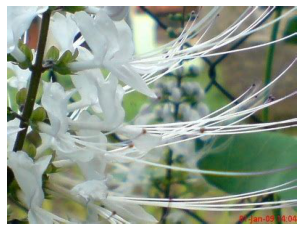

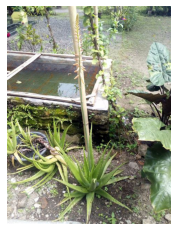

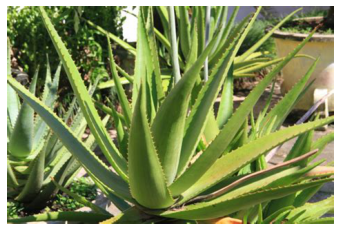

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_daunjarak = [os.path.join(daunjarak_dir, fname) 
                for fname in daunjarak_files[pic_index-2:pic_index]]
next_daunpegagan = [os.path.join(daunpegagan_dir, fname) 
                for fname in daunpegagan_files[pic_index-2:pic_index]]
next_daunsirih = [os.path.join(daunsirih_dir, fname) 
                for fname in daunsirih_files[pic_index-2:pic_index]]
next_kumiskucing = [os.path.join(kumiskucing_dir, fname) 
                for fname in kumiskucing_files[pic_index-2:pic_index]]
next_lidahbuaya = [os.path.join(lidahbuaya_dir, fname) 
                for fname in lidahbuaya_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_daunjarak + next_daunpegagan + next_daunsirih + next_kumiskucing + next_lidahbuaya ):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/data/training"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/data/testing"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("herbacrop")

Found 4500 images belonging to 5 classes.
Found 502 images belonging to 5 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_______________________________________

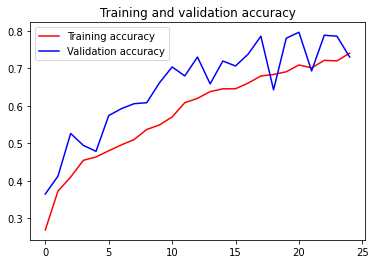

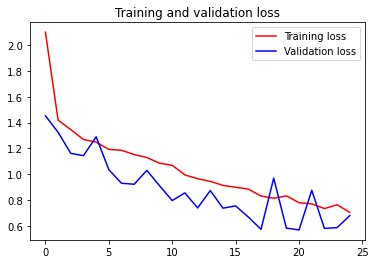

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0) 
plt.figure()


plt.show()

print(train_generator)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0] == 1.0 :
    print('Daun Jarak')
  elif classes[0][1] == 1.0:
    print('Daun Pegagan')
  elif classes[0][2] == 1.0:
    print('Daun Sirih')
  elif classes[0][3] == 1.0:
    print('Kumis Kucing')
  elif classes[0][4] == 1.0:
    print('Lidah Buaya')

Saving daun (105).jpg to daun (105).jpg
daun (105).jpg
Daun Jarak


In [ ]:
import numpy as np
import os
import PIL
from numpy import asarray
from matplotlib import image
from matplotlib import pyplot
from PIL import Image

quant_dir = "/content/gdrive/MyDrive/Data Capstone/quant/"

pixl_img = np.array([np.array(Image.open(quant_dir + fname).convert("L").resize((224,224))) for fname in os.listdir(quant_dir)]) 

# convert image to numpy array
data = asarray(pixl_img)
print(type(data))
# summarize shape
print(data.shape)

<class 'numpy.ndarray'>
(150, 224, 224)


In [ ]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: saved_model/1/assets


In [ ]:
#Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
#Full Integer Quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

converter.target_spec.supported_types = [tf.float16]

tflite_quant_model = converter.convert()

In [ ]:
import pathlib

tflite_model_file = pathlib.Path('HerbaCrop_model2_float.tflite')

open(tflite_model_file, "wb").write(tflite_quant_model)

In [ ]:
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>